In [1]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import scanpy as sc

# Because of licensing limitations we cannot publish the code for the function that performs cell calling
# We used the code from Cellranger, that computes the maximum gradient on log-trasformed bracode rank plot
from cell_calling import compute_highest_gradient, prepare_barcodes

## DEFND

In [2]:
filename = "atac_fragments_defnd.tsv.gz"

In [3]:
accumulated_counts = prepare_barcodes(filename)

test


787it [07:35,  1.73it/s]


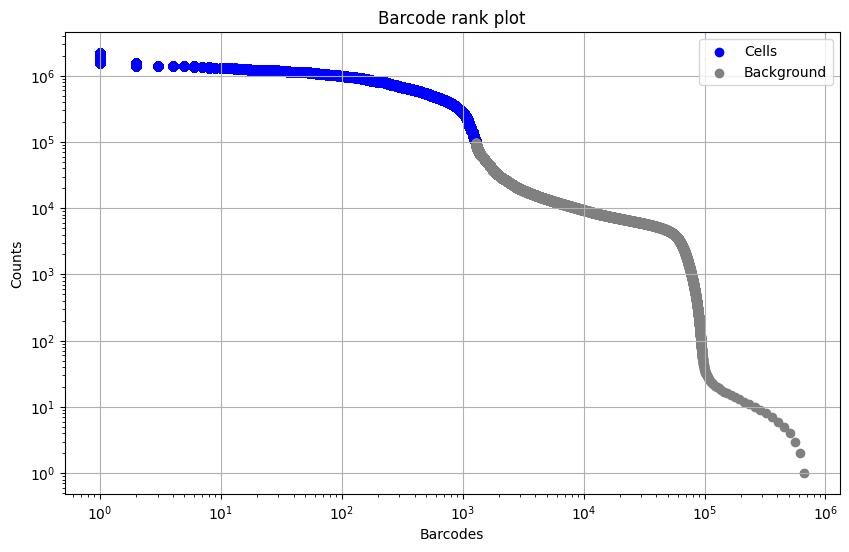

In [4]:
top_gradient = compute_highest_gradient(
    accumulated_counts, figure_path="DEFND_gradient.png", hi_limit=99.95
)

In [5]:
bfile = "DEFND_barcodes.tsv"
with open(bfile, "w") as out:
    for cell in top_gradient.index:
        out.write(cell + "\n")

### Prepare overlap with RNA

In [6]:
gex_cells = sc.read_10x_h5("filtered_feature_bc_matrix_defnd.h5").obs.index

In [7]:
top_gradient = pd.DataFrame(top_gradient)
top_gradient["is_gex_cell"] = top_gradient.index.isin(gex_cells)
gexa = top_gradient[top_gradient.is_gex_cell].index

In [8]:
bfile = "DEFND_barcodes_rna.tsv"
with open(bfile, "w") as out:
    for cell in gexa:
        out.write(cell + "\n")

## HIPSDR

In [9]:
filename = "atac_fragments_hipsdr.tsv.gz"

In [10]:
accumulated_counts = prepare_barcodes(filename)

test


302it [02:50,  1.78it/s]


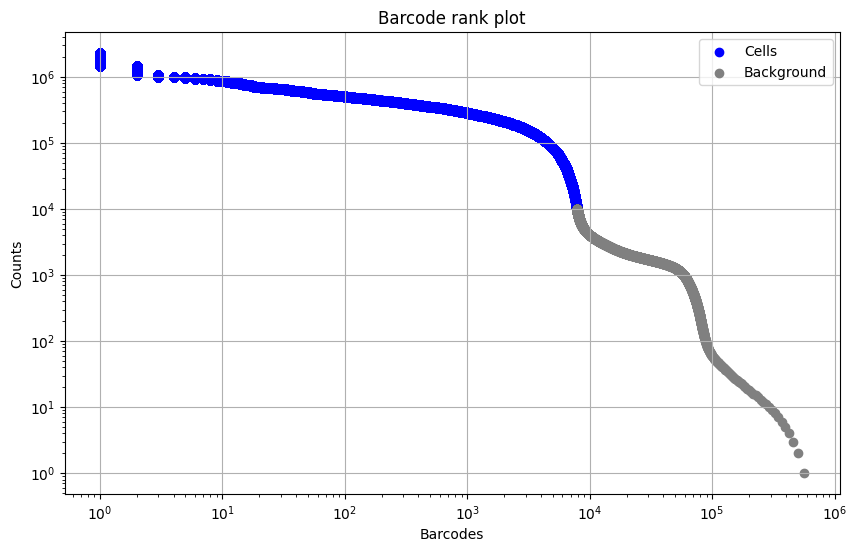

In [11]:
top_gradient = compute_highest_gradient(
    accumulated_counts, figure_path="HIPSDR_gradient.png", hi_limit=99.95
)

In [12]:
bfile = "HIPSDR_barcodes.tsv"
with open(bfile, "w") as out:
    for cell in top_gradient.index:
        out.write(cell + "\n")

### Prepare overlap with RNA

In [13]:
gex_cells = sc.read_10x_h5("filtered_feature_bc_matrix_hipsdr.h5").obs.index

In [14]:
top_gradient = pd.DataFrame(top_gradient)
top_gradient["is_gex_cell"] = top_gradient.index.isin(gex_cells)
gexa = top_gradient[top_gradient.is_gex_cell].index

In [15]:
bfile = "HIPSDR_barcodes_rna.tsv"
with open(bfile, "w") as out:
    for cell in gexa:
        out.write(cell + "\n")